________________________________________________________________________________________________________________________


* Yuvraj Sutar 
* yuvrajsutar009@gmail.com
_ _________________________________________________________________________________________________________________________
_  _________________________________________________________________________________________________________________________


In [199]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

read the dataset


In [200]:
data = pd.read_csv('C:\\Users\\Yuvraj\\Desktop\\Data Science\\kaggle\\Data\\AirQuality.csv', delimiter=';', decimal=',')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [201]:
data.shape

(9471, 17)

In [202]:
data.info

<bound method DataFrame.info of             Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9466         NaN       NaN     NaN          NaN       NaN       NaN   
9467         NaN       NaN     NaN          NaN       NaN       NaN   
9468         NaN       NaN     NaN          NaN       NaN       NaN   
9469         NaN       NaN     NaN          NaN       NaN       NaN   
9470         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    

In [203]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


Drop any rows with missing values


In [204]:
data.drop(['CO(GT)','Unnamed: 15','Unnamed: 16'],axis = 1,inplace = True)

Formatting some object columns from strings to floats

In [205]:

data.replace(to_replace=',',value='.',regex=True,inplace=True) 

for i in 'C6H6(GT) T RH AH'.split():
    data[i] = pd.to_numeric(data[i],errors='coerce') 

Replacing null data from -200 to NaN for posterior treatment

In [206]:
data.replace(to_replace=-200,value=np.nan,inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   PT08.S1(CO)    8991 non-null   float64
 3   NMHC(GT)       914 non-null    float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.0+ MB


Formatting Date and Time to datetime type


In [207]:

data['Date'] = pd.to_datetime(data['Date'],dayfirst=True) 

data['Time'] = pd.to_datetime(data['Time'],format= '%H.%M.%S' ).dt.time

data.head()

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [208]:
data.drop('NMHC(GT)', axis=1, inplace=True) 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   PT08.S1(CO)    8991 non-null   float64       
 3   C6H6(GT)       8991 non-null   float64       
 4   PT08.S2(NMHC)  8991 non-null   float64       
 5   NOx(GT)        7718 non-null   float64       
 6   PT08.S3(NOx)   8991 non-null   float64       
 7   NO2(GT)        7715 non-null   float64       
 8   PT08.S4(NO2)   8991 non-null   float64       
 9   PT08.S5(O3)    8991 non-null   float64       
 10  T              8991 non-null   float64       
 11  RH             8991 non-null   float64       
 12  AH             8991 non-null   float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 962.0+ KB


To know if there null values or not


In [209]:
data.apply(lambda x: len(x.isnull()))

Date             9471
Time             9471
PT08.S1(CO)      9471
C6H6(GT)         9471
PT08.S2(NMHC)    9471
NOx(GT)          9471
PT08.S3(NOx)     9471
NO2(GT)          9471
PT08.S4(NO2)     9471
PT08.S5(O3)      9471
T                9471
RH               9471
AH               9471
dtype: int64

In [210]:
data.isnull().sum()

Date              114
Time              114
PT08.S1(CO)       480
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64

In [211]:
ar=data.dropna()

In [212]:
ar.isnull().sum()

Date             0
Time             0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [213]:
ar.shape

(7393, 13)

In [214]:
ar.drop_duplicates(inplace= True)

In [215]:
assert ar1.duplicated().sum() == 0

In [216]:
ar.apply(lambda x: len(x.unique()))

Date              349
Time               24
PT08.S1(CO)      1023
C6H6(GT)          394
PT08.S2(NMHC)    1204
NOx(GT)           898
PT08.S3(NOx)     1169
NO2(GT)           274
PT08.S4(NO2)     1559
PT08.S5(O3)      1714
T                 433
RH                744
AH               5732
dtype: int64

In [217]:
ar.describe()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000
mean,1112.122278,10.364548,950.654268,242.229541,824.573921,112.145137,1452.011362,1045.718247,17.964805,48.775450,0.994757
std,218.278380,7.442771,265.449876,206.343574,256.935228,47.629141,353.507996,405.885125,9.001148,17.495361,0.403659
min,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,950.000000,4.700000,749.000000,97.000000,649.000000,77.000000,1207.000000,748.000000,11.300000,35.100000,0.699100
50%,1078.000000,8.600000,925.000000,178.000000,792.000000,109.000000,1460.000000,991.000000,17.100000,49.000000,0.964700
75%,1246.000000,14.300000,1128.000000,321.000000,955.000000,140.000000,1683.000000,1307.000000,24.100000,62.200000,1.271100
max,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600


In [218]:
ar.info

<bound method DataFrame.info of            Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0    2004-03-10  18:00:00       1360.0      11.9         1046.0    166.0   
1    2004-03-10  19:00:00       1292.0       9.4          955.0    103.0   
2    2004-03-10  20:00:00       1402.0       9.0          939.0    131.0   
3    2004-03-10  21:00:00       1376.0       9.2          948.0    172.0   
4    2004-03-10  22:00:00       1272.0       6.5          836.0    131.0   
...         ...       ...          ...       ...            ...      ...   
9352 2005-04-04  10:00:00       1314.0      13.5         1101.0    472.0   
9353 2005-04-04  11:00:00       1163.0      11.4         1027.0    353.0   
9354 2005-04-04  12:00:00       1142.0      12.4         1063.0    293.0   
9355 2005-04-04  13:00:00       1003.0       9.5          961.0    235.0   
9356 2005-04-04  14:00:00       1071.0      11.9         1047.0    265.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3) 

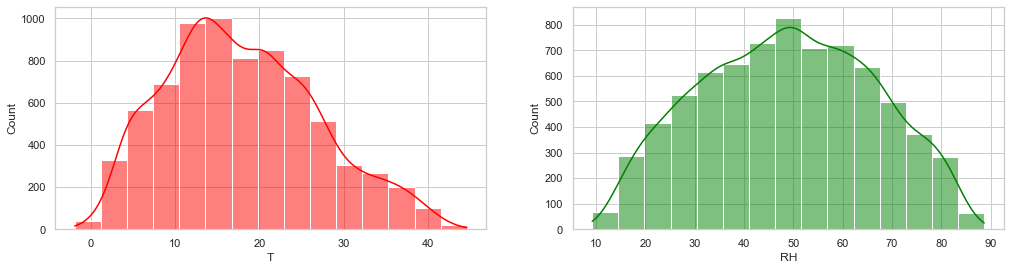

In [219]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(ar1["T"],stat="count",color="red",bins=15,kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(ar1.RH,stat="count",color = "green",bins=15,kde={'alpha':0.5})
plt.show()

<AxesSubplot:xlabel='AH', ylabel='Count'>

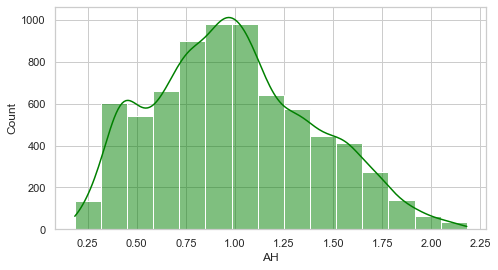

In [220]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(ar1.AH,stat="count",color="green",bins=15,kde={'alpha':0.5})

In [221]:
sns.set_theme(style="whitegrid")

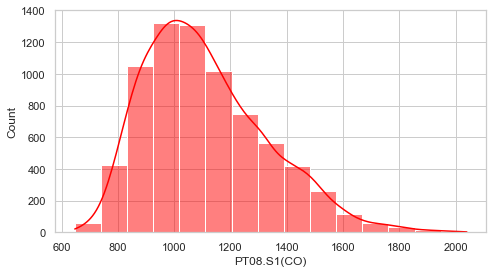

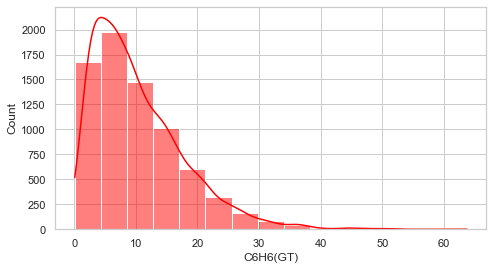

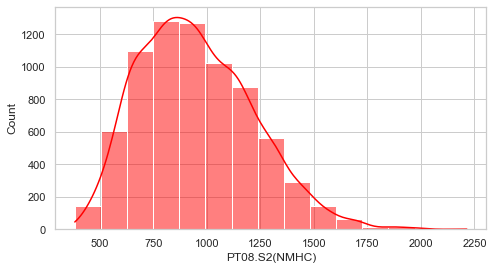

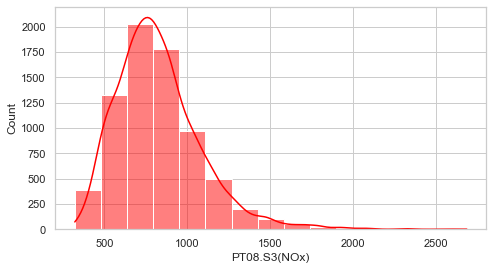

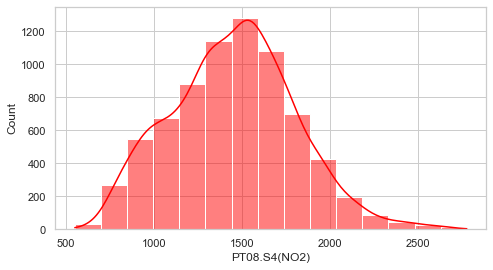

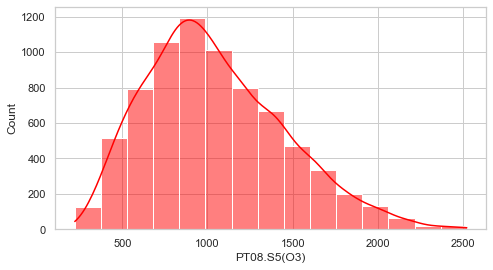

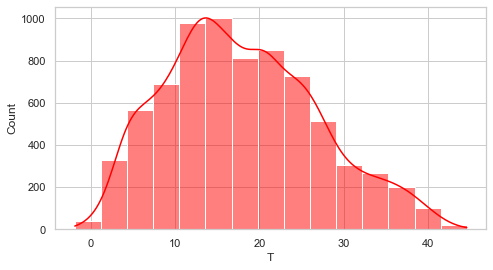

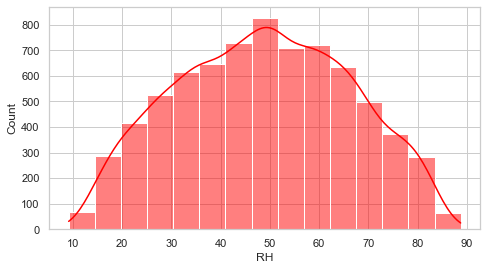

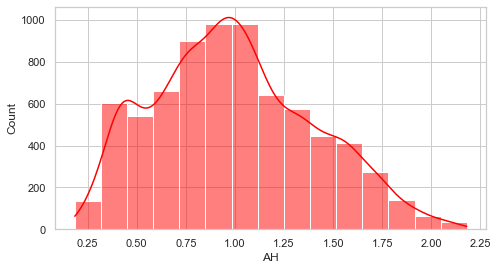

In [222]:
for i in ar1.columns[2:13]:
    plt.figure(figsize=(17,9))
    plt.subplot(2,2,1)
    sns.histplot(x=ar1[i],stat="count",color="red",bins=15,kde={'alpha':0.5})

Removing NOx(GT) and NO2(GT) sensor data due the ammount of null values if compared to other sensors

In [223]:

pd.options.mode.chained_assignment = None
ar.drop(['NOx(GT)','NO2(GT)'],axis=1, inplace=True)
ar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7393 entries, 0 to 9356
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           7393 non-null   datetime64[ns]
 1   Time           7393 non-null   object        
 2   PT08.S1(CO)    7393 non-null   float64       
 3   C6H6(GT)       7393 non-null   float64       
 4   PT08.S2(NMHC)  7393 non-null   float64       
 5   PT08.S3(NOx)   7393 non-null   float64       
 6   PT08.S4(NO2)   7393 non-null   float64       
 7   PT08.S5(O3)    7393 non-null   float64       
 8   T              7393 non-null   float64       
 9   RH             7393 non-null   float64       
 10  AH             7393 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 693.1+ KB


Eliminating rows with NaN values 

In [225]:


ar1_filt = ar1.dropna(how='any', axis=0)
ar1_filt.reset_index(drop=True,inplace=True)

In [226]:
ar1_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7393 entries, 0 to 7392
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           7393 non-null   datetime64[ns]
 1   Time           7393 non-null   object        
 2   PT08.S1(CO)    7393 non-null   float64       
 3   C6H6(GT)       7393 non-null   float64       
 4   PT08.S2(NMHC)  7393 non-null   float64       
 5   PT08.S3(NOx)   7393 non-null   float64       
 6   PT08.S4(NO2)   7393 non-null   float64       
 7   PT08.S5(O3)    7393 non-null   float64       
 8   T              7393 non-null   float64       
 9   RH             7393 non-null   float64       
 10  AH             7393 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 635.5+ KB



Adding a column with the week days 


In [233]:

ar1_filt['Week Day'] = ar1_filt['Date'].dt.day_name() 

#Rearranging columns

cols = ar1_filt.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:11]
ar1_filt = ar1_filt[cols]
ar1_filt.head(10)

,Date,RH,AH,Week Day,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T
0,2004-03-10,48.9,0.7578,Wednesday,18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6
1,2004-03-10,47.7,0.7255,Wednesday,19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3
2,2004-03-10,54.0,0.7502,Wednesday,20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9
3,2004-03-10,60.0,0.7867,Wednesday,21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0
4,2004-03-10,59.6,0.7888,Wednesday,22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2
5,2004-03-10,59.2,0.7848,Wednesday,23:00:00,1197.0,4.7,750.0,1337.0,1393.0,949.0,11.2
6,2004-03-11,56.8,0.7603,Thursday,00:00:00,1185.0,3.6,690.0,1462.0,1333.0,733.0,11.3
7,2004-03-11,60.0,0.7702,Thursday,01:00:00,1136.0,3.3,672.0,1453.0,1333.0,730.0,10.7
8,2004-03-11,59.7,0.7648,Thursday,02:00:00,1094.0,2.3,609.0,1579.0,1276.0,620.0,10.7
9,2004-03-11,60.5,0.7465,Thursday,04:00:00,1011.0,1.3,527.0,1818.0,1197.0,445.0,10.1


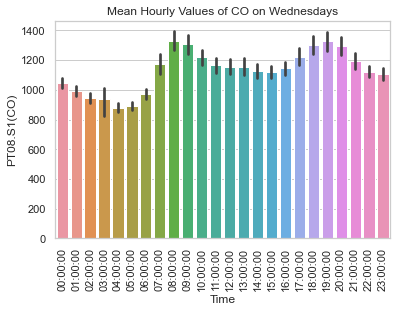

In [234]:
#Creating new dataframe with only wednesday data

ar1_wed = ar1_filt[ar1_filt['Week Day'] == 'Wednesday']

#Plotting the mean hourly value of CO on Wednesdays

sns.barplot(x='Time',y='PT08.S1(CO)', data=ar1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of CO on Wednesdays')
plt.xticks(rotation=90)
plt.show()

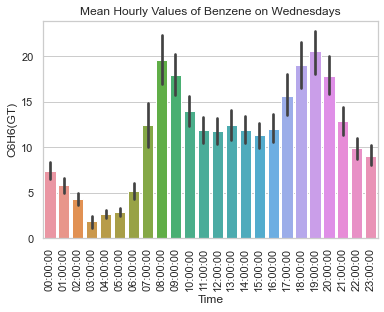

In [235]:
#Plotting the mean hourly value of Benzene on Wednesdays

sns.barplot(x='Time',y='C6H6(GT)', data=ar1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of Benzene on Wednesdays')
plt.xticks(rotation=90)
plt.show()

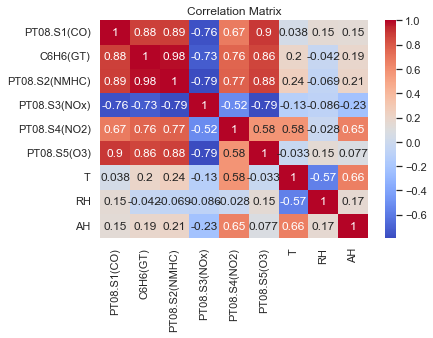

In [236]:
#Plotting correlation matrix

sns.heatmap(ar.corr(),annot=True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
sns.pairplot(ar1)
plt.show() 

* Yuvraj Sutar 
* yuvrajsutar009@gmail.com